In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

In [2]:
df_2018 = pd.read_csv('2018.csv', index_col=0)

### Fill missing value by -1

In [3]:
df_2018.fillna(-1, inplace=True)
df_2018.isnull().sum()

code    0
dia     0
cd      0
hoa     0
khtn    0
khxh    0
su      0
anh     0
van     0
sinh    0
toan    0
li      0
city    0
dtype: int64

In [4]:
df_2018.index

Float64Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
              ...
              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
             dtype='float64', length=744396)

In [5]:
df_2018.reset_index(drop=True, inplace=True)

In [6]:
df_2018.index

RangeIndex(start=0, stop=744396, step=1)

In [7]:
df_2018.head()

,code,dia,cd,hoa,khtn,khxh,su,anh,van,sinh,toan,li,city
0,18010226,6.50,8.25,-1.0,-1.00,5.92,3.0,3.0,3.75,-1.0,3.0,-1.00,18
1,18010229,9.00,8.25,-1.0,-1.00,7.75,6.0,9.0,7.50,-1.0,8.8,-1.00,18
2,18010232,-1.00,-1.00,5.5,5.42,-1.00,-1.0,4.0,5.50,5.0,6.0,5.75,18
3,18010242,4.75,7.25,-1.0,-1.00,5.17,3.5,2.6,5.75,-1.0,3.4,-1.00,18
4,18010247,6.25,8.00,-1.0,-1.00,5.92,3.5,3.0,6.75,-1.0,3.8,-1.00,18


# Cá nhân

In [8]:
code_HaGiang = 5
df_HaGiang = df_2018[df_2018.city == code_HaGiang]
df_HaGiang

,code,dia,cd,hoa,khtn,khxh,su,anh,van,sinh,toan,li,city
47345,5002915,5.25,4.25,-1.00,-1.00,3.92,2.25,3.4,2.00,-1.00,1.4,-1.00,5
47346,5000921,6.75,7.75,3.75,4.58,5.75,2.75,2.4,4.75,3.50,5.6,6.50,5
47347,5000863,3.75,5.25,2.75,2.75,3.83,2.50,4.0,3.50,2.75,3.8,2.75,5
47348,5000867,5.00,6.75,3.50,2.92,5.33,4.25,3.0,2.75,3.25,2.4,2.00,5
47349,5000909,-1.00,-1.00,3.25,5.08,-1.00,-1.00,9.6,3.25,3.00,9.4,9.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50439,5003209,4.50,6.25,-1.00,-1.00,5.00,4.25,2.6,4.00,-1.00,2.6,-1.00,5
50440,5003213,4.50,4.50,-1.00,-1.00,4.08,3.25,2.6,3.75,-1.00,2.8,-1.00,5
50441,5003217,3.25,6.00,-1.00,-1.00,4.25,3.50,1.4,2.75,-1.00,4.0,-1.00,5
50442,5003220,4.75,6.25,-1.00,-1.00,4.33,2.00,3.0,3.25,-1.00,2.0,-1.00,5


### Phân tích thí sinh có điểm 3 môn bất kì đều > 9

In [9]:
# dataframe chứa dữ liệu điểm các môn học
subject_df = df_2018.drop(['khtn', 'khxh', 'code', 'city'], axis=1)
subject_df

,dia,cd,hoa,su,anh,van,sinh,toan,li
0,6.50,8.25,-1.00,3.0,3.0,3.75,-1.00,3.0,-1.00
1,9.00,8.25,-1.00,6.0,9.0,7.50,-1.00,8.8,-1.00
2,-1.00,-1.00,5.50,-1.0,4.0,5.50,5.00,6.0,5.75
3,4.75,7.25,-1.00,3.5,2.6,5.75,-1.00,3.4,-1.00
4,6.25,8.00,-1.00,3.5,3.0,6.75,-1.00,3.8,-1.00
...,...,...,...,...,...,...,...,...,...
744391,-1.00,-1.00,3.00,-1.0,6.0,4.50,3.25,4.6,3.75
744392,-1.00,-1.00,5.50,-1.0,5.0,6.00,4.00,7.0,5.25
744393,-1.00,-1.00,5.50,-1.0,4.0,3.50,2.25,5.2,6.25
744394,-1.00,-1.00,6.25,-1.0,5.4,4.50,3.00,7.8,7.50


In [10]:
above_nine_df = df_2018[(subject_df > 9.0).sum(axis=1) >= 3]
above_nine_df

,code,dia,cd,hoa,khtn,khxh,su,anh,van,sinh,toan,li,city
1036,18017058,-1.00,-1.00,9.75,8.75,-1.00,-1.00,5.6,6.50,7.00,9.2,9.50,18
22054,11002825,9.00,9.50,-1.00,-1.00,9.25,9.25,6.0,9.50,-1.00,5.2,-1.00,11
31241,19010385,-1.00,-1.00,9.75,8.83,-1.00,-1.00,5.4,5.00,7.25,9.8,9.50,19
45673,62000908,9.25,8.50,-1.00,-1.00,9.17,9.75,3.6,9.25,-1.00,9.0,-1.00,62
46119,62000108,-1.00,-1.00,9.25,-1.00,-1.00,-1.00,-1.0,-1.00,9.25,9.2,-1.00,62
47706,5000744,-1.00,-1.00,9.50,-1.00,-1.00,-1.00,2.4,-1.00,-1.00,9.2,9.75,5
47788,5001080,-1.00,-1.00,9.50,7.00,-1.00,-1.00,9.4,-1.00,2.25,9.4,9.25,5
49362,5001885,-1.00,-1.00,3.25,4.92,-1.00,-1.00,9.2,2.75,1.75,9.6,9.75,5
49675,5000010,-1.00,-1.00,3.75,5.25,-1.00,-1.00,9.6,6.25,2.25,9.6,9.75,5
49677,5000071,-1.00,-1.00,9.25,7.17,-1.00,-1.00,3.2,4.00,3.00,9.2,9.25,5


<AxesSubplot:xlabel='city', ylabel='count'>

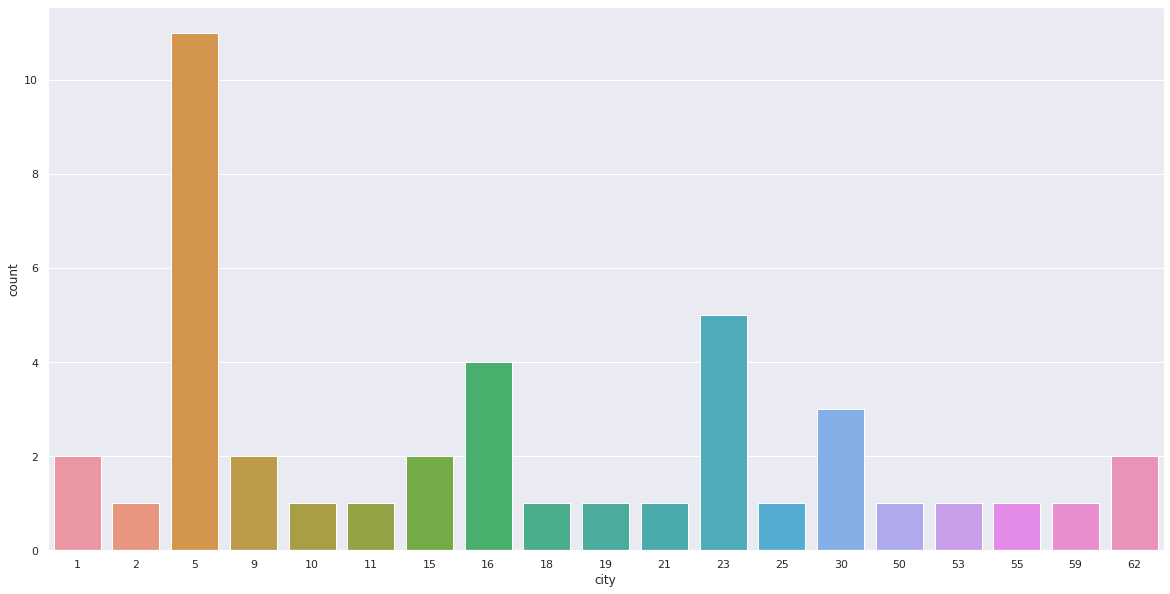

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(data = above_nine_df, x = 'city')

In [47]:
#groupby the city
data = above_nine_df.groupby("city")['city'].count()
data

city
1      2
2      1
5     11
9      2
10     1
11     1
15     2
16     4
18     1
19     1
21     1
23     5
25     1
30     3
50     1
53     1
55     1
59     1
62     2
Name: city, dtype: int64

<AxesSubplot:ylabel='city'>

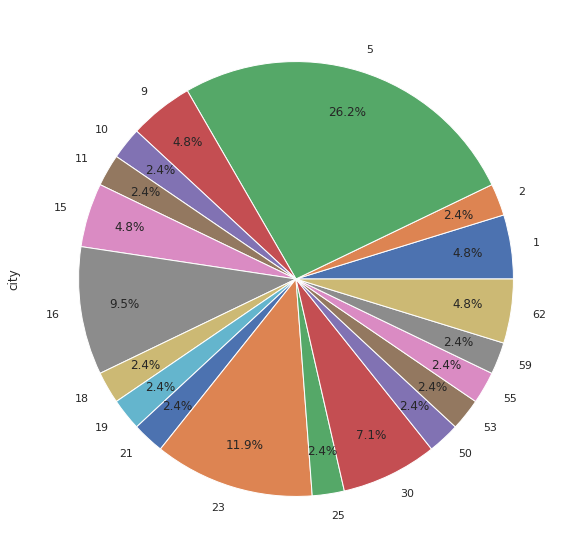

In [44]:
pie, ax = plt.subplots(figsize=[20,10])
data.plot.pie(autopct="%.1f%%", pctdistance=0.8)

Dựa vào 2 biểu đồ  trên, ta có thể quan sát số lượng học sinh có điểm thi 3 môn trên 9 điểm của tỉnh Hà Giang có sự vượt trội hơn hẳn so với các tỉnh khác trên cả nước (Chiếm tỉ lệ 26.2% so với cả nước). Gấp hơn 2 lần so với tỉnh đứng thứ 2 (Hòa Bình) với chỉ 11.9% và gấp 6 lần so với tỉ lệ trung bình của các tỉnh (4.1%)

#### => Sự bất thường này dẫn đến nhiều nghi ngờ trong việc gian lận thi cử của tỉnh Hà Giang vào năm 2018